## VGGNET WITH KERAS ON CUSTOM DATASET

In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Conv2D, Flatten,
    MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import (
    VGG16, preprocess_input, decode_predictions
)
from tensorflow.keras.utils import get_file
from tensorflow.keras import backend as K


In [2]:
img_rows,img_cols,img_channels = 300,300,3
img_input= Input(shape=(img_rows,img_cols,img_channels),name='input')

base = VGG16(
    weights='imagenet',
    include_top=False,
    input_tensor=img_input)

base.trainable=False


x=Flatten(name='flatten')(base.output)
x=Dense(4096,activation='relu',name='fc1')(x)
x=Dense(4096,activation='relu',name='fc2')(x)
preds = Dense(2,activation='softmax',name='predictions')(x)

model = Model(inputs=img_input,outputs=preds,name='vgg16_custom_manual')

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "vgg16_custom_manual"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 300, 300, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 300, 300, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 150, 150, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 150, 150, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 150, 150, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 75, 75, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 75, 75, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 75, 75, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 75, 75, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 37, 37, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 37, 37, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 37, 37, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 37, 37, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 18, 18, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     169,873,408 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 201,377,602 (768.19 MB)

 Trainable params: 186,662,914 (712.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path=os.listdir('vggnet_dataset')
room_types = os.listdir('vggnet_dataset')

print(room_types)
print("Types of rooms found: ",len(dataset_path))

['bed_room', 'living_room']
Types of rooms found:  2


In [10]:
rooms = []

for items in room_types:
    all_rooms = os.listdir('vggnet_dataset'+'/'+items)

    for room in all_rooms:
        rooms.append((items,'vggnet_dataset'+'/'+items+'/'+room))
        print(rooms)

[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg')]
[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-1846251__340.jpg')]
[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-1846251__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-3786264__340.jpg')]
[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-1846251__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-3786264__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-4065946__340.jpg')]
[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-1846251__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-3786264__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-4065946__340.jpg'), ('bed_room', 'vggnet_dataset/bed_room/bed-4343379__340.jpg')]
[('bed_room', 'vggnet_dataset/bed_room/bed-1303451__340.jpg'), ('

In [11]:
rooms_df = pd.DataFrame(data=rooms,columns=['room type','image'])
print(rooms_df.head())

  room type                                         image
0  bed_room  vggnet_dataset/bed_room/bed-1303451__340.jpg
1  bed_room  vggnet_dataset/bed_room/bed-1846251__340.jpg
2  bed_room  vggnet_dataset/bed_room/bed-3786264__340.jpg
3  bed_room  vggnet_dataset/bed_room/bed-4065946__340.jpg
4  bed_room  vggnet_dataset/bed_room/bed-4343379__340.jpg


In [12]:
import cv2
path ='vggnet_dataset/'

im_size=300

images=[]
labels=[]

for i in room_types:
    data_path = path + i
    filenames = [i for i in os.listdir(data_path)]

    for f in filenames:
        img = cv2.imread(data_path + '/' +f)
        img = cv2.resize(img,(im_size,im_size))
        images.append(img)
        labels.append(i)

In [13]:
images = np.array(images)
images= images.astype('float32')/255.0
images.shape

(76, 300, 300, 3)

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

y=rooms_df['room type'].values

y_labelencoder = LabelEncoder()
y=y_labelencoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [18]:
y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(sparse_output=False)
Y=onehotencoder.fit_transform(y)
Y.shape

(76, 2)

In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images,Y= shuffle(images,Y,random_state=1)

train_x,test_x,train_y,test_y=train_test_split(images,Y,test_size=0.05,random_state=415)

In [20]:
model.fit(train_x,train_y,epochs=50,batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.5768 - loss: 34.4687
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4666 - loss: 10.8536
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.5022 - loss: 5.3592
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5534 - loss: 3.4414
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6923 - loss: 1.5181
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7995 - loss: 0.6575
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8876 - loss: 0.2969
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 1.0000 - loss: 0.0137
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.9006 - loss: 0.3088
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 1.0000 - loss: 5.4543e-04
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.9596 - loss: 0.0614
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 1.0000 - loss: 6.5636e-04
Epo

In [22]:
preds = model.evaluate(test_x,test_y)
print("loss= "+str(preds[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 1.0399
loss= 1.0398777723312378


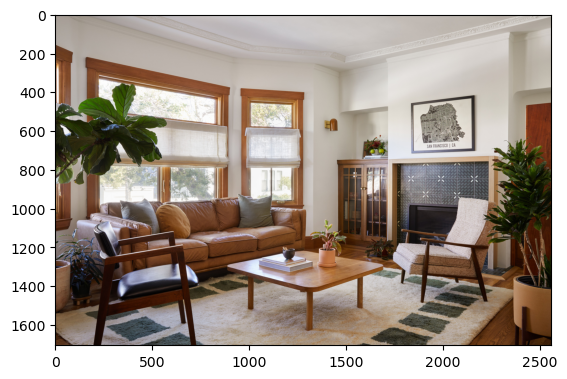

In [24]:
from matplotlib.pyplot import imread,imshow

img_path = 'test_img.jpg'
img=image.load_img(img_path,target_size=(300,300))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

my_image = imread(img_path)
imshow(my_image)

In [25]:
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
[[0. 1.]]
